# Testing the logistic regression using various real-world data sets.

## Author: Bojian Xu, bojianxu@ewu.edu

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logistic_regression as logic
import sys
sys.path.append('..')
from code_misc.utils import MyUtils

In [3]:
data_set = 'ionosphere'

print(data_set+'/'+'hello')

ionosphere/hello


In [4]:
# READ in data
df_X_train = pd.read_csv(data_set+'/'+'X_train.csv', header=None)
df_y_train = pd.read_csv(data_set+'/'+'y_train.csv', header=None)
df_X_test = pd.read_csv(data_set+'/'+'X_test.csv', header=None)
df_y_test = pd.read_csv(data_set+'/'+'y_test.csv', header=None)

# save in numpy arrays
X_train = df_X_train.to_numpy()
y_train = df_y_train.to_numpy()
X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy()

# get training set size
n_train = X_train.shape[0]

# normalize all features to [0,1] or [-1,1]
if data_set == 'ionosphere':
    X_all = MyUtils.normalize_neg1_pos1(np.concatenate((X_train, X_test), axis=0))


X_train = X_all[:n_train]
X_test = X_all[n_train:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(y_test)

(280, 34)
(280, 1)
(71, 34)
(71, 1)


In [5]:
#print(y_train[-10:])

In [6]:
# build the model
log = logic.LogisticRegression()
log2 =logic.LogisticRegression()
log3 = logic.LogisticRegression()
log4 =logic.LogisticRegression()

In [7]:
# train the model
log.fit(X_train, y_train, lam = .1, eta = .1, iterations = 10000, SGD = False, mini_batch_size = 20, degree = 3)
#log2.fit(X_train, y_train, lam = .01, eta = .1, iterations = 10000, SGD = False, mini_batch_size = 20, degree = 3)
#log3.fit(X_train, y_train, lam = .01, eta = .1, iterations = 10000, SGD = False, mini_batch_size = 20, degree = 3)
#log4.fit(X_train, y_train, lam = .01, eta = .1, iterations = 10000, SGD = False, mini_batch_size = 20, degree = 4)
#log.fit(X_train, y_train, lam = 0, eta = 0.1, iterations = 50000, SGD = True, mini_batch_size = 20, degree = 3)

In [8]:
print('misclassfied percentage from log: ', log.error(X_train, y_train)/X_train.shape[0])
#print('misclassfied percentage from log2: ', log2.error(X_train, y_train)/X_train.shape[0])
#print('misclassfied percentage from log3: ', log3.error(X_train, y_train)/X_train.shape[0])
#print('misclassfied percentage from log4: ', log4.error(X_train, y_train)/X_train.shape[0])

#print('misclassfied percentage from validation: ', log.error(X_test, y_test)/X_test.shape[0])

misclassfied percentage from log:  0.007142857142857143


In [16]:
preds = log.predict(X_test)

In [17]:
for i in range(y_test.shape[0]):
    print('test sample ', i)
    if np.sign(preds[i]-0.5) != y_test[i]:
        print('misclassified!!')
    print('predicted probablity of being +1 is: ', preds[i])
    print('label is', y_test[i])
    print('\n')

test sample  0
predicted probablity of being +1 is:  [0.99999723]
label is [1.]


test sample  1
predicted probablity of being +1 is:  [0.99990878]
label is [1.]


test sample  2
predicted probablity of being +1 is:  [0.2305814]
label is [-1.]


test sample  3
predicted probablity of being +1 is:  [0.99973836]
label is [1.]


test sample  4
predicted probablity of being +1 is:  [1.]
label is [1.]


test sample  5
predicted probablity of being +1 is:  [0.99999992]
label is [1.]


test sample  6
predicted probablity of being +1 is:  [1.]
label is [1.]


test sample  7
predicted probablity of being +1 is:  [0.99728852]
label is [1.]


test sample  8
predicted probablity of being +1 is:  [0.21536904]
label is [-1.]


test sample  9
predicted probablity of being +1 is:  [6.2410161e-07]
label is [-1.]


test sample  10
predicted probablity of being +1 is:  [1.]
label is [1.]


test sample  11
predicted probablity of being +1 is:  [1.]
label is [1.]


test sample  12
predicted probablity of b

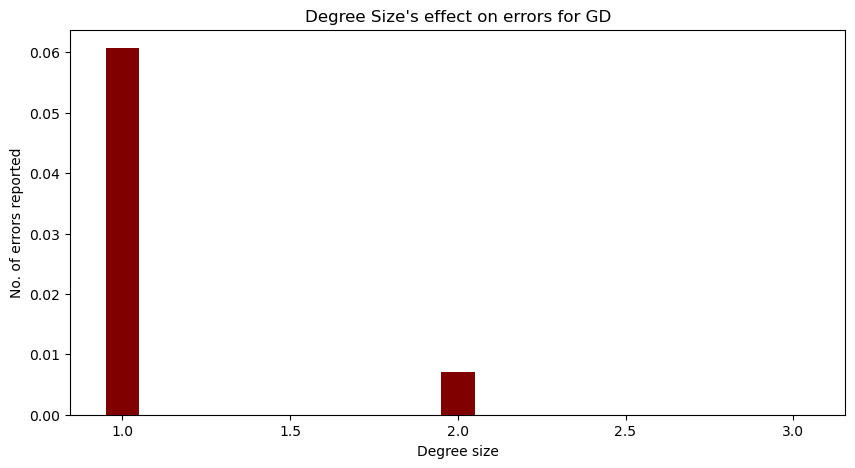

In [30]:
# creating the dataset
data = {log.degree:log.error(X_train, y_train)/X_train.shape[0], log2.degree:log2.error(X_train, y_train)/X_train.shape[0], log3.degree:log3.error(X_train, y_train)/X_train.shape[0]}
xCord = list(data.keys())
yCord = list(data.values())
  
fig = plt.subplots(figsize = (10, 5))

#plt.xlim(left=-2, right=len(xCord)-11)
#plt.ylim(bottom=-.1, top=1)  # Adjust the bottom and top limits as needed
 
# creating the bar plot
plt.bar(xCord, yCord, color ='maroon', 
        width = .1)
 
plt.xlabel("Degree size")
plt.ylabel("No. of errors reported")
plt.title("Degree Size's effect on errors for GD")
plt.show()